# Sales Forecast Visualization

This notebook focuses on visualizing the sales forecast with confidence intervals using Matplotlib and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set polished style
plt.style.use('ggplot')
sns.set_context("talk")
pd.plotting.register_matplotlib_converters()

## 1. Load Data & Retrain Model
We need to retrain the model to generate the forecast object which contains confidence intervals.

In [2]:
# Load Aggregated Data
data_path = "../data/monthly_sales.csv"
if not os.path.exists(data_path):
    data_path = "../../data/monthly_sales.csv"

df = pd.read_csv(data_path)
df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date', inplace=True)

print(f"Loaded {len(df)} months of data.")

Loaded 48 months of data.


In [3]:
# Retrain SARIMA(1,1,1)(1,1,1,12) on full dataset
print("Training SARIMA model...")
model = SARIMAX(df['sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Forecast predictions and confidence intervals
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

print("Forecast generated.")

Training SARIMA model...


c:\Users\rolir\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\rolir\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\rolir\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Forecast generated.


## 2. Advanced Visualization

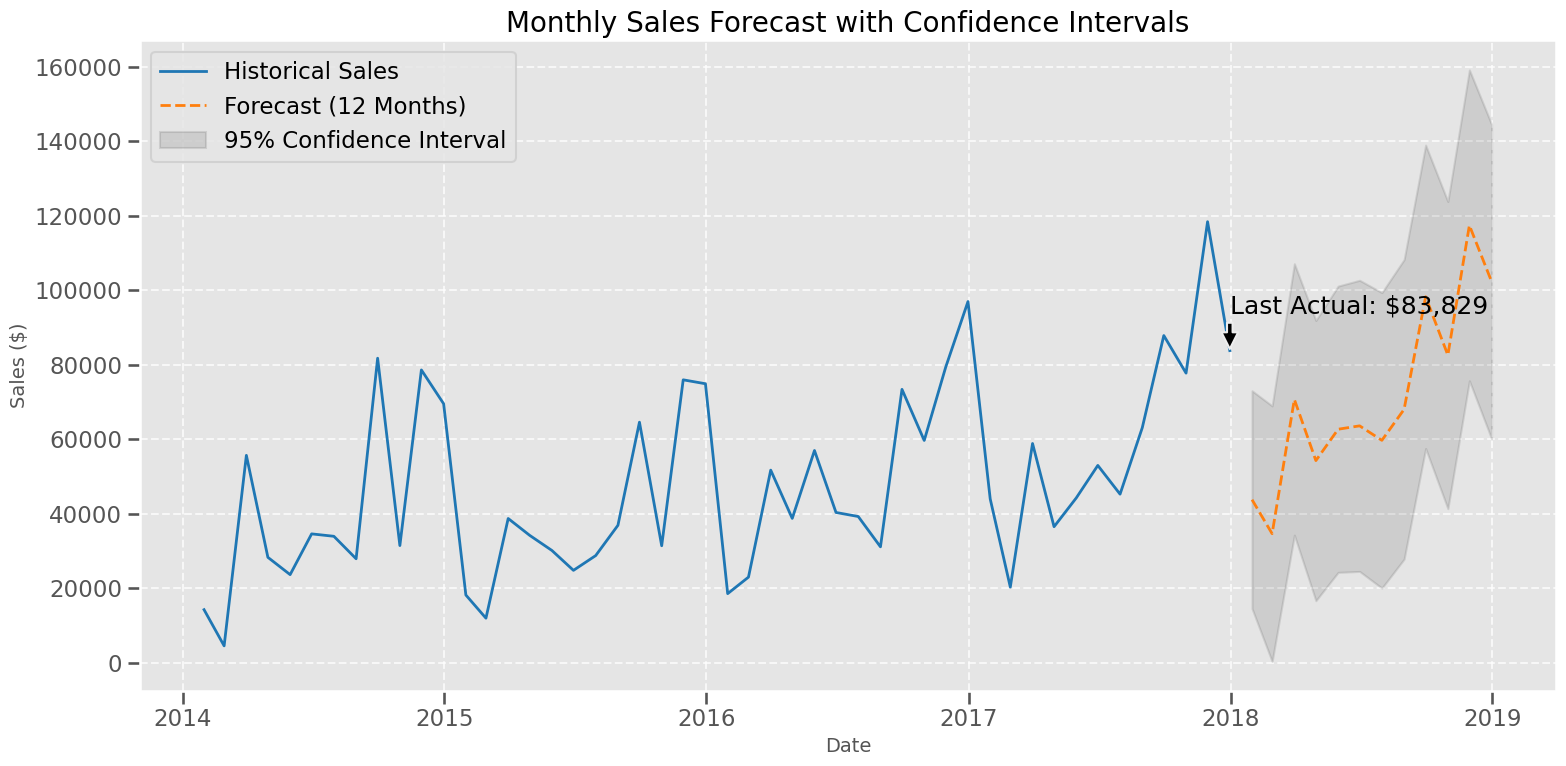

In [5]:
plt.figure(figsize=(16, 8))

# Plot Historical Data
plt.plot(df.index, df['sales'], label='Historical Sales', color='tab:blue', linewidth=2)

# Plot Forecast
plt.plot(forecast_mean.index, forecast_mean, label='Forecast (12 Months)', color='tab:orange', linewidth=2, linestyle='--')

# Plot Confidence Intervals
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='k', alpha=0.1, label='95% Confidence Interval')

# Formatting
plt.title('Monthly Sales Forecast with Confidence Intervals', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales ($)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate last historical point
last_date = df.index[-1]
last_sales = df['sales'].iloc[-1]
plt.annotate(f'Last Actual: ${last_sales:,.0f}', 
             xy=(last_date, last_sales), 
             xytext=(last_date, last_sales + 10000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

## 3. Zooming into Recent History & Forecast

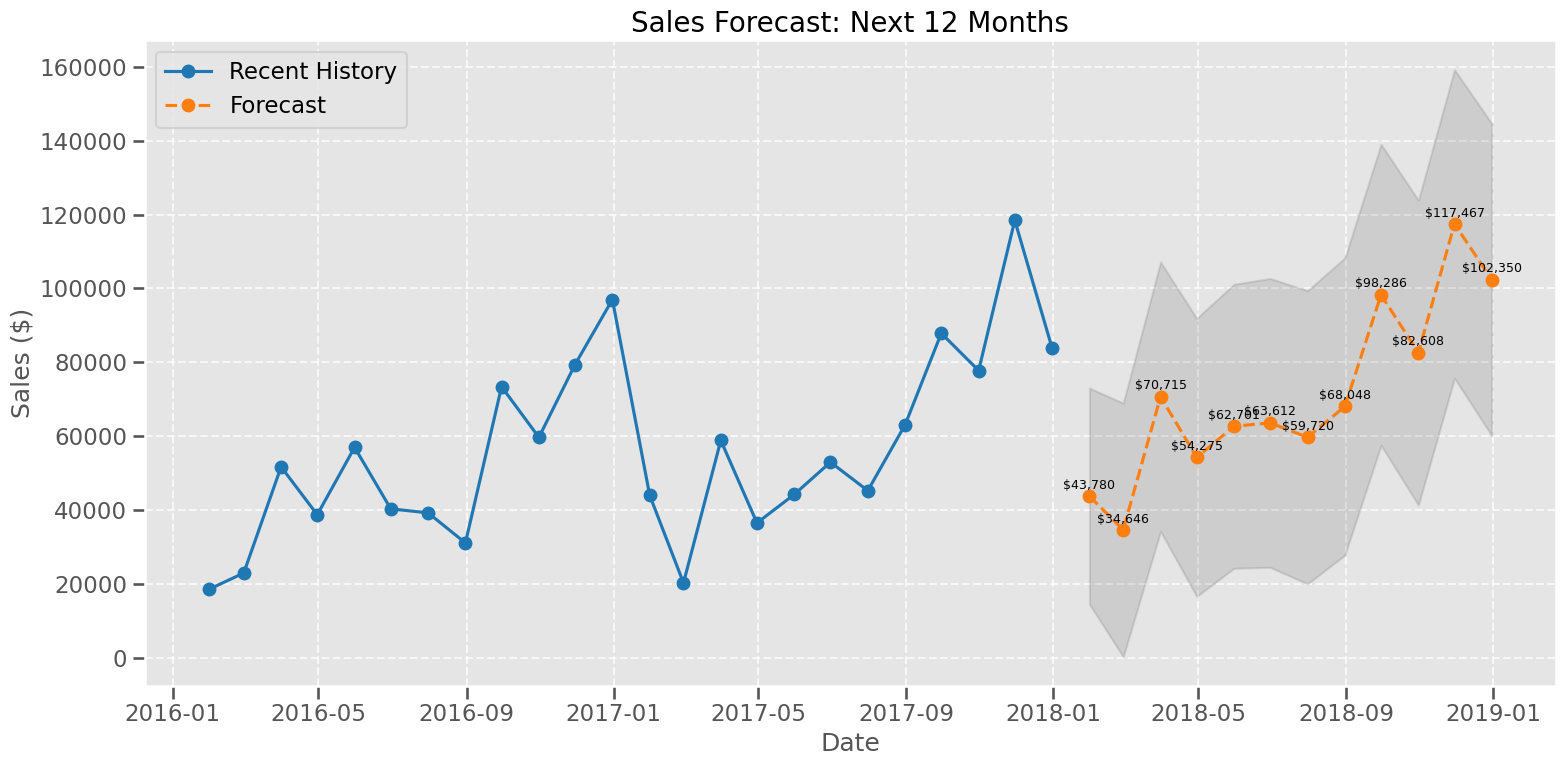

In [7]:
# Filter for last 24 months + Forecast
start_zoom = df.index[-24]

plt.figure(figsize=(16, 8))

# Historical Zoom
zoom_df = df[df.index >= start_zoom]
plt.plot(zoom_df.index, zoom_df['sales'], label='Recent History', color='tab:blue', marker='o')

# Forecast
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='tab:orange', marker='o', linestyle='--')

# Confidence Interval
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='k', alpha=0.1)

plt.title('Sales Forecast: Next 12 Months', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add values to forecast points
for x, y in zip(forecast_mean.index, forecast_mean):
    plt.text(x, y+2000, f'${y:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()